In [44]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd # Used for data loading & manipulation

df = pd.read_excel('D:/ShreeramPrajapati/Assignment/Final_Airlines_India_Gulf.xlsx') # Reading data into memory for processing

In [2]:
df.head() # Display first 5 rows

,airline,flight,Region,source_city,Year,Revenue (USD Bn),Profit/Loss (USD Bn),Passenger Volume (Millions),Capacity (ASKs Bn),Load Factor (%),Fleet Size,Narrow-Body Count,Wide-Body Count,Number of Destinations
0,SpiceJet,SG-8709,India,Dubai International Airport,2021,5.0,0.5,75,90,88,250,250,0,80
1,SpiceJet,SG-8157,India,Dubai International Airport,2022,2.0,-1.2,30,40,65,260,260,0,60
2,Emirates,I5-764,Gulf,Dubai International Airport,2020,4.5,0.3,70,85,85,300,300,0,95
3,Qatar Airways,UK-995,Gulf,Doha,2019,6.2,0.8,90,110,89,350,350,0,110
4,Qatar Airways,UK-963,Gulf,Doha,2022,4.5,-0.8,25,60,78,140,90,50,45


In [3]:
df.info() # See column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   airline                      300153 non-null  object 
 1   flight                       300153 non-null  object 
 2   Region                       300153 non-null  object 
 3   source_city                  300153 non-null  object 
 4   Year                         300153 non-null  int64  
 5   Revenue (USD Bn)             300153 non-null  float64
 6   Profit/Loss (USD Bn)         300153 non-null  float64
 7   Passenger Volume (Millions)  300153 non-null  int64  
 8   Capacity (ASKs Bn)           300153 non-null  int64  
 9   Load Factor (%)              300153 non-null  int64  
 10  Fleet Size                   300153 non-null  int64  
 11  Narrow-Body Count            300153 non-null  int64  
 12  Wide-Body Count              300153 non-null  int64  
 13 

In [4]:
df.describe() # Quick statistics summary

,Year,Revenue (USD Bn),Profit/Loss (USD Bn),Passenger Volume (Millions),Capacity (ASKs Bn),Load Factor (%),Fleet Size,Narrow-Body Count,Wide-Body Count,Number of Destinations
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.00000
mean,2022.071014,8.824856,-0.145835,34.833595,103.957149,76.750077,191.875510,101.252495,90.623016,92.91588
std,2.026880,8.396821,1.436994,22.016629,84.802705,9.938370,74.229869,95.528927,95.941270,43.65848
min,2019.000000,0.800000,-5.000000,6.000000,15.000000,55.000000,90.000000,0.000000,0.000000,30.00000
25%,2020.000000,2.500000,-0.800000,18.000000,40.000000,77.000000,130.000000,35.000000,0.000000,55.00000
50%,2022.000000,6.000000,0.200000,30.000000,80.000000,80.000000,180.000000,85.000000,65.000000,80.00000
75%,2024.000000,9.500000,0.600000,50.000000,110.000000,84.000000,260.000000,130.000000,140.000000,110.00000
max,2025.000000,32.000000,2.500000,90.000000,330.000000,89.000000,350.000000,350.000000,300.000000,180.00000


In [5]:
# Check for null values in each column 
null_counts = df.isnull().sum()
print("Null values per column:\n", null_counts)

Null values per column:
 airline                        0
flight                         0
Region                         0
source_city                    0
Year                           0
Revenue (USD Bn)               0
Profit/Loss (USD Bn)           0
Passenger Volume (Millions)    0
Capacity (ASKs Bn)             0
Load Factor (%)                0
Fleet Size                     0
Narrow-Body Count              0
Wide-Body Count                0
Number of Destinations         0
dtype: int64


In [6]:
# Check for duplicate rows 
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 197820


In [7]:
# Removing all 197820 duplicate columns
df = df.drop_duplicates()

In [8]:
# Check again for duplicate rows 
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [9]:
df['Year'].unique()

array([2021, 2022, 2020, 2019, 2023, 2024, 2025])

In [10]:
# All recovery metrics must be indexed to 2019 = 100. Filter baseline data for reference table
baseline = df[df['Year'] == 2019]

baseline_airline = (
    baseline
    .groupby('airline')
    .agg({
        'Revenue (USD Bn)':'mean',
        'Passenger Volume (Millions)':'mean',
        'Capacity (ASKs Bn)':'mean',
        'Load Factor (%)':'mean',
        'Fleet Size':'mean',
        'Number of Destinations':'mean'
    })
    .reset_index()
)

In [11]:
baseline.head()

,airline,flight,Region,source_city,Year,Revenue (USD Bn),Profit/Loss (USD Bn),Passenger Volume (Millions),Capacity (ASKs Bn),Load Factor (%),Fleet Size,Narrow-Body Count,Wide-Body Count,Number of Destinations
3,Qatar Airways,UK-995,Gulf,Doha,2019,6.2,0.8,90,110,89,350,350,0,110
21,Etihad Airways,G8-101,Gulf,Abu Dhabi,2019,6.0,-2.0,12,60,63,190,55,135,90
31,Indigo,6E-2373,India,Dubai International Airport,2019,6.0,0.6,35,75,83,180,110,70,70
39,SpiceJet,SG-2976,India,Dubai International Airport,2019,32.0,2.5,65,330,84,300,0,300,180
40,Air_India,AI-504,India,Dubai International Airport,2019,8.0,-0.1,18,90,79,100,30,70,80


In [12]:
baseline_airline.head()

,airline,Revenue (USD Bn),Passenger Volume (Millions),Capacity (ASKs Bn),Load Factor (%),Fleet Size,Number of Destinations
0,Air_India,8.811618,34.952842,103.869457,76.749219,192.131480,92.895066
1,Emirates,8.928228,34.851933,104.879650,76.836616,192.217360,93.997082
2,Etihad Airways,8.681889,34.623729,102.479419,76.640194,191.058111,92.217918
3,Indigo,8.844516,34.923878,104.224896,76.883619,192.014114,93.224202
4,Qatar Airways,8.762243,34.760085,103.329795,76.707006,191.797594,92.620311


In [13]:
# Revenue Recovery Index: It allows comparison across airlines and regions.
df = df.merge(
    baseline_airline[['airline', 'Revenue (USD Bn)']],
    on = 'airline',
    how = 'left',
    suffixes = ('', '_2019')
)

df['Revenue_Recovery_Index'] = (
    df['Revenue (USD Bn)'] / df['Revenue (USD Bn)_2019']
) * 100

In [14]:
df.head()

,airline,flight,Region,source_city,Year,Revenue (USD Bn),Profit/Loss (USD Bn),Passenger Volume (Millions),Capacity (ASKs Bn),Load Factor (%),Fleet Size,Narrow-Body Count,Wide-Body Count,Number of Destinations,Revenue (USD Bn)_2019,Revenue_Recovery_Index
0,SpiceJet,SG-8709,India,Dubai International Airport,2021,5.0,0.5,75,90,88,250,250,0,80,9.018476,55.441740
1,SpiceJet,SG-8157,India,Dubai International Airport,2022,2.0,-1.2,30,40,65,260,260,0,60,9.018476,22.176696
2,Emirates,I5-764,Gulf,Dubai International Airport,2020,4.5,0.3,70,85,85,300,300,0,95,8.928228,50.401941
3,Qatar Airways,UK-995,Gulf,Doha,2019,6.2,0.8,90,110,89,350,350,0,110,8.762243,70.758134
4,Qatar Airways,UK-963,Gulf,Doha,2022,4.5,-0.8,25,60,78,140,90,50,45,8.762243,51.356710


In [15]:
# Dimension-Wise Analysis: Revenue & Financial Performance
rev_trend = (
    df.groupby(['airline', 'Year'])
    .agg({
        'Revenue_Recovery_Index':'mean',
        'Profit/Loss (USD Bn)':'sum'
    })
    .reset_index()
)

In [60]:
rev_trend.head()

,airline,Year,Revenue_Recovery_Index,Profit/Loss (USD Bn)
0,Air_India,2019,100.000000,-491.7
1,Air_India,2020,101.388184,-476.8
2,Air_India,2021,98.849386,-434.6
3,Air_India,2022,99.066920,-505.2
4,Air_India,2023,100.185148,-497.5


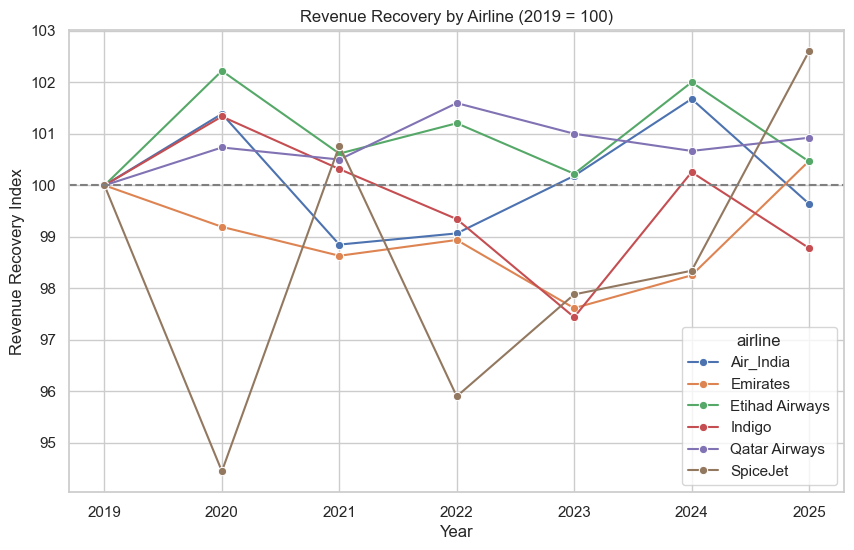

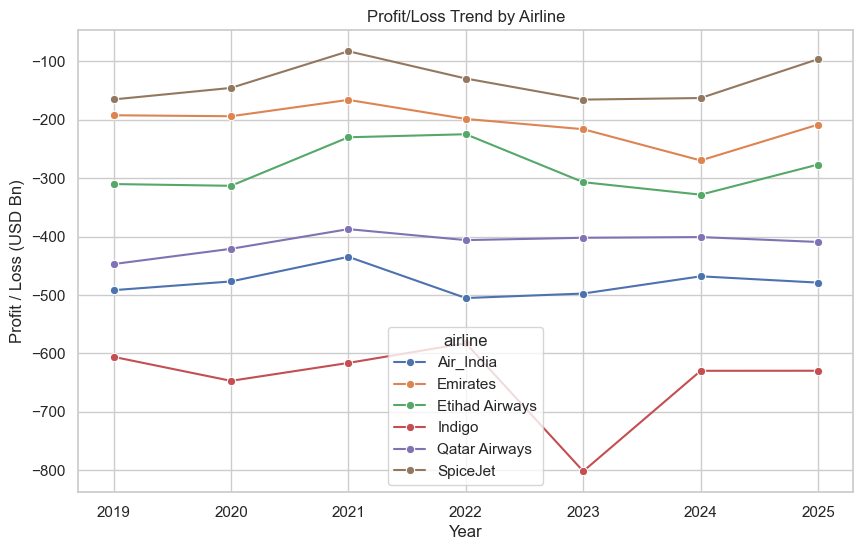

In [61]:
# Revenue & Financial Recovery Trend
plt.figure(figsize=(10,6))
sns.lineplot(
    data=rev_trend,
    x='Year',
    y='Revenue_Recovery_Index',
    hue='airline',
    marker='o'
)
plt.axhline(100, linestyle='--', color='gray')
plt.title('Revenue Recovery by Airline (2019 = 100)')
plt.ylabel('Revenue Recovery Index')
plt.show()

# Profit/Loss Trend
plt.figure(figsize=(10,6))
sns.lineplot(
    data=rev_trend,
    x='Year',
    y='Profit/Loss (USD Bn)',
    hue='airline',
    marker='o'
)
plt.title('Profit/Loss Trend by Airline')
plt.ylabel('Profit / Loss (USD Bn)')
plt.show()
# Airlines in India and the Gulf have mostly brought their revenues back to pre-COVID levels. However, this has not translated into profits. 
# Most airlines are still making losses, which shows that higher costs, fuel prices, and pressure on ticket margins are holding them back. 
# This means the recovery is not yet complete in terms of long-term financial health.

In [18]:
# Merged full 2019 baseline with (all metrics)

baseline_airline_2019 = (
    df[df['Year'] == 2019]
    .groupby('airline', as_index = False)
    .agg({
        'Revenue (USD Bn)': 'mean',
        'Passenger Volume (Millions)': 'mean',
        'Capacity (ASKs Bn)': 'mean',
        'Load Factor (%)': 'mean',
        'Fleet Size': 'mean',
        'Number of Destinations': 'mean'
    })
    .rename(columns = {
        'Revenue (USD Bn)': 'Revenue_2019',
        'Passenger Volume (Millions)': 'Passengers_2019',
        'Capacity (ASKs Bn)': 'Capacity_2019',
        'Load Factor (%)': 'LoadFactor_2019',
        'Fleet Size': 'Fleet_2019',
        'Number of Destinations': 'Destinations_2019'
    })
)

In [19]:
baseline_airline_2019.head()

,airline,Revenue_2019,Passengers_2019,Capacity_2019,LoadFactor_2019,Fleet_2019,Destinations_2019
0,Air_India,8.811618,34.952842,103.869457,76.749219,192.131480,92.895066
1,Emirates,8.928228,34.851933,104.879650,76.836616,192.217360,93.997082
2,Etihad Airways,8.681889,34.623729,102.479419,76.640194,191.058111,92.217918
3,Indigo,8.844516,34.923878,104.224896,76.883619,192.014114,93.224202
4,Qatar Airways,8.762243,34.760085,103.329795,76.707006,191.797594,92.620311


In [20]:
# Merge baseline into current df: To avoid duplicate
df = df.drop(columns=[
    col for col in df.columns if col.endswith('_2019')
], errors = 'ignore')

df = df.merge(
    baseline_airline_2019,
    on = 'airline',
    how = 'left'
)

In [21]:
# Passenger Recovery Index
df['Passenger_Recovery_Index'] = (
    df['Passenger Volume (Millions)'] / df['Passengers_2019']
) * 100

In [22]:
# Capacity_Recovery_Index
df['Capacity_Recovery_Index'] = (
    df['Capacity (ASKs Bn)'] / df['Capacity_2019']
) * 100

In [30]:
# Load Factor Trend
load_factor_trend = (
    df.groupby(['airline', 'Year'])['Load Factor (%)']
    .mean()
    .reset_index()
)

In [23]:
# Fleet_Recovery_Index
df['Fleet_Recovery_Index'] = (
    df['Fleet Size'] / df['Fleet_2019']
) * 100

In [32]:
# Narrow vs Wide Body Strategy

fleet_mix = (
    df.groupby(['airline', 'Year'])
    .agg({
        'Narrow-Body Count' : 'sum',
        'Wide-Body Count' : 'sum'
    })
    .reset_index()
)

In [34]:
# Destinations_Recovery_Index: Network & Route Expansion
df['Destinations_Recovery_Index'] = (
    df['Number of Destinations'] / df['Destinations_2019']
) * 100

In [35]:
# Composite Recovery Index : For headline KPI
'''Create a weighted index: Metric	Weight
                            Revenue	30%
                            Passenger	25%
                            Capacity	15%
                            Fleet	15%
                            Network	15% '''

df['Composite_Recovery_Index'] = (
    0.30 * df['Revenue_Recovery_Index'] + 
    0.25 * df['Passenger_Recovery_Index'] +
    0.15 * df['Capacity_Recovery_Index'] +
    0.15 * df['Fleet_Recovery_Index'] +
    0.15 * df['Destinations_Recovery_Index']
    )

In [36]:
# To verify all recovery index, Expected mean will 100.
df.loc[df['Year'] == 2019, [
    'airline',
    'Revenue_Recovery_Index',
    'Passenger_Recovery_Index',
    'Capacity_Recovery_Index',
    'Fleet_Recovery_Index',
    'Destinations_Recovery_Index'
]].describe()

,Revenue_Recovery_Index,Passenger_Recovery_Index,Capacity_Recovery_Index,Fleet_Recovery_Index,Destinations_Recovery_Index
count,14744.000000,14744.000000,14744.000000,14744.000000,14744.000000
mean,100.000000,100.000000,100.000000,100.000000,100.000000
std,94.795908,63.055412,81.246671,38.508250,46.884580
min,8.870678,17.131617,14.181388,46.341136,31.739371
25%,33.265044,51.394850,47.271292,66.937196,63.478741
50%,68.091923,86.078440,80.361196,98.846431,89.928216
75%,144.148524,115.527707,132.359617,130.850241,148.117062
max,368.583397,259.937341,322.015878,183.190338,195.189834


In [27]:
airline_year = (
    df.groupby(['airline', 'Region', 'Year'], as_index=False)
      .agg({
          'Revenue_Recovery_Index': 'mean',
          'Passenger_Recovery_Index': 'mean',
          'Capacity_Recovery_Index': 'mean',
          'Load Factor (%)': 'mean',
          'Fleet Size': 'mean',
          'Number of Destinations': 'mean'
      })
)


In [55]:
# “Recovery indices were calculated by normalizing airline-level financial and operational metrics to 2019 averages (2019 = 100). 
# Flight-level observations were subsequently aggregated to airline–year means to derive comparable recovery trajectories.”
airline_year.head()

,airline,Region,Year,Revenue_Recovery_Index,Passenger_Recovery_Index,Capacity_Recovery_Index,Load Factor (%),Fleet Size,Number of Destinations
0,Air_India,India,2019,100.000000,100.000000,100.000000,76.749219,192.131480,92.895066
1,Air_India,India,2020,101.388184,99.559312,101.025069,76.686305,192.298652,93.339079
2,Air_India,India,2021,98.849386,99.750899,99.060809,76.791967,191.920700,92.646756
3,Air_India,India,2022,99.066920,99.465045,99.136488,76.697842,192.246566,92.545782
4,Air_India,India,2023,100.185148,100.035459,100.119277,76.693168,192.626965,92.713120


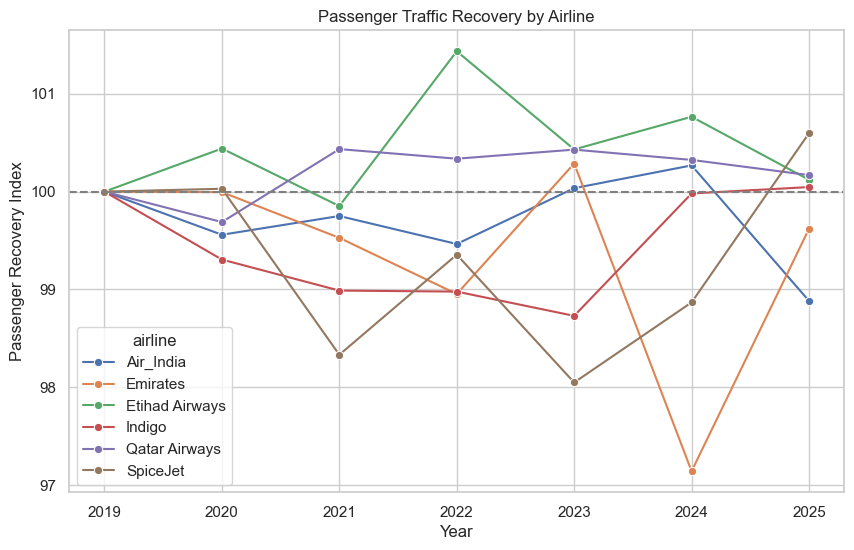

In [62]:
# Passenger Traffic Recovery
pax_trend = (
    df.groupby(['airline', 'Year'])['Passenger_Recovery_Index']
    .mean().reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=pax_trend,
    x='Year',
    y='Passenger_Recovery_Index',
    hue='airline',
    marker='o'
)
plt.axhline(100, linestyle='--', color='gray')
plt.title('Passenger Traffic Recovery by Airline')
plt.ylabel('Passenger Recovery Index')
plt.show()
# Passenger volumes have rebounded steadily across airlines, with some carriers close to or above pre-pandemic passenger levels.

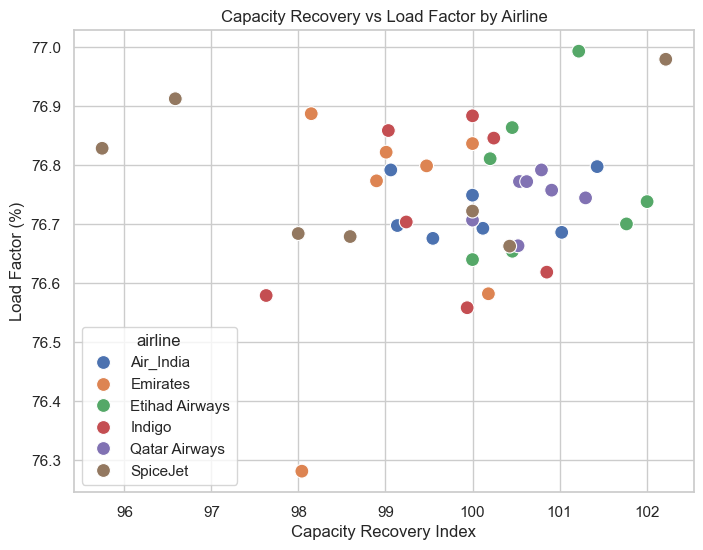

In [63]:
# Capacity & Load Factor
cap_lf = (
    df.groupby(['airline', 'Year'], as_index=False)
    .agg({'Capacity_Recovery_Index':'mean', 'Load Factor (%)':'mean'})
)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=cap_lf,
    x='Capacity_Recovery_Index',
    y='Load Factor (%)',
    hue='airline',
    s=100
)
plt.title('Capacity Recovery vs Load Factor by Airline')
plt.xlabel('Capacity Recovery Index')
plt.ylabel('Load Factor (%)')
plt.show()

# Load factors stayed stable throughout the recovery period, suggesting airlines adjusted capacity carefully to avoid flying empty seats.
# Capacity has been restored gradually, and load factors remain fairly stable, suggesting airlines are balancing supply and demand well.
# Available seat capacity compared with pre-COVID
# Load factor (percentage of seats filled)
# This shows how many seats airlines are making available and how many of those seats are actually being filled by passengers.

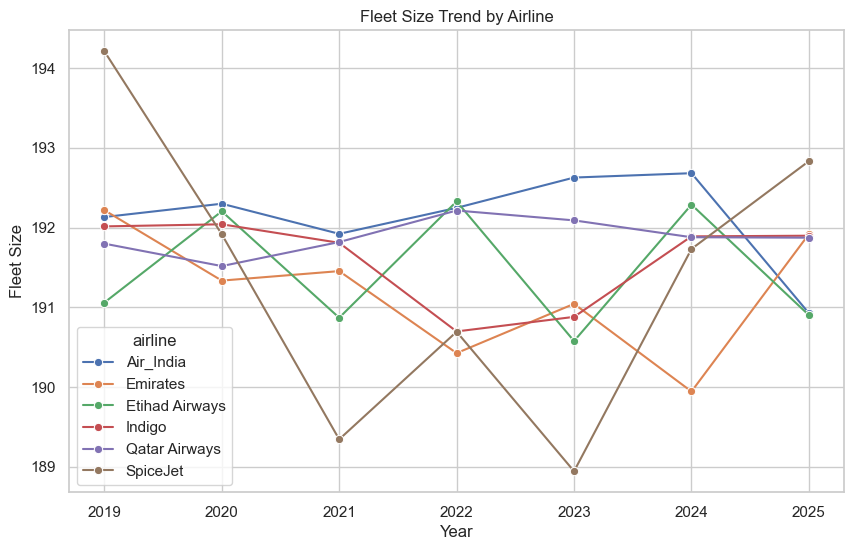

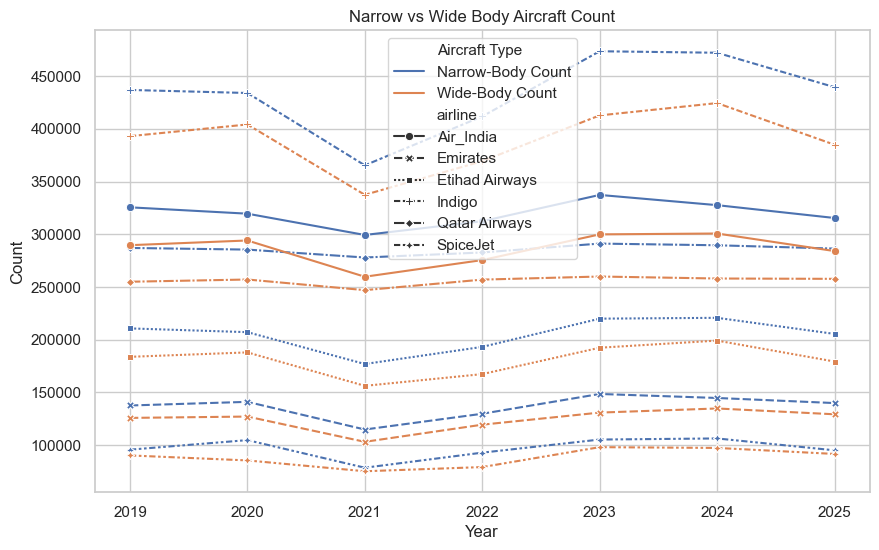

In [64]:
# Fleet size trend
plt.figure(figsize=(10,6))
sns.lineplot(
    data=airline_year,
    x='Year',
    y='Fleet Size',
    hue='airline',
    marker='o'
)
plt.title('Fleet Size Trend by Airline')
plt.ylabel('Fleet Size')
plt.show()

# Fleet mix (if available)
fleet_mix_long = fleet_mix.melt(
    id_vars=['airline','Year'],
    value_vars=['Narrow-Body Count','Wide-Body Count'],
    var_name='Aircraft Type',
    value_name='Count'
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=fleet_mix_long,
    x='Year',
    y='Count',
    hue='Aircraft Type',
    style='airline',
    markers=True
)
plt.title('Narrow vs Wide Body Aircraft Count')
plt.show()

# Total fleet size changes over time, How airlines balance narrow-body and wide-body aircraft, Fleet expansion or reduction
# This looks at changes in the number of aircraft an airline has, and whether they are using more short-haul planes or long-haul planes during recovery.
# Fleet sizes have stayed mostly consistent, with some shifts between short-haul and long-haul aircraft depending on strategy.

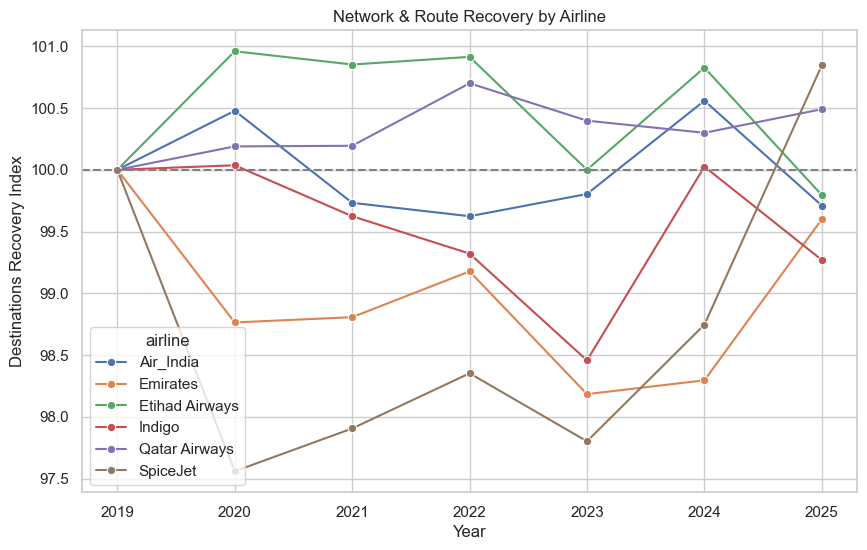

In [65]:
# Destinations Recovery Index by Year
network_trend = (
    df.groupby(['airline','Year'], as_index=False)
    ['Destinations_Recovery_Index'].mean()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=network_trend,
    x='Year',
    y='Destinations_Recovery_Index',
    hue='airline',
    marker='o'
)
plt.axhline(100, linestyle='--', color='gray')
plt.title('Network & Route Recovery by Airline')
plt.ylabel('Destinations Recovery Index')
plt.show()

# Number of destinations served, New routes added or dropped, International vs domestic network restoration
# This shows how many cities or airports each airline flies to now compared with before the pandemic — helping us see how quickly route networks are being restored or expanded.
# Airlines are slowly expanding their route networks, focusing first on core destinations before resuming wider expansion.

In [37]:
# India vs Gulf Comparison
region_summary = (
    df.groupby(['Region', 'Year']) ['Composite_Recovery_Index']
    .mean()
    .reset_index()
)

In [67]:
region_summary.head()

,Region,Year,Composite_Recovery_Index
0,Gulf,2019,100.000000
1,Gulf,2020,100.402718
2,Gulf,2021,100.093813
3,Gulf,2022,100.559963
4,Gulf,2023,100.043136


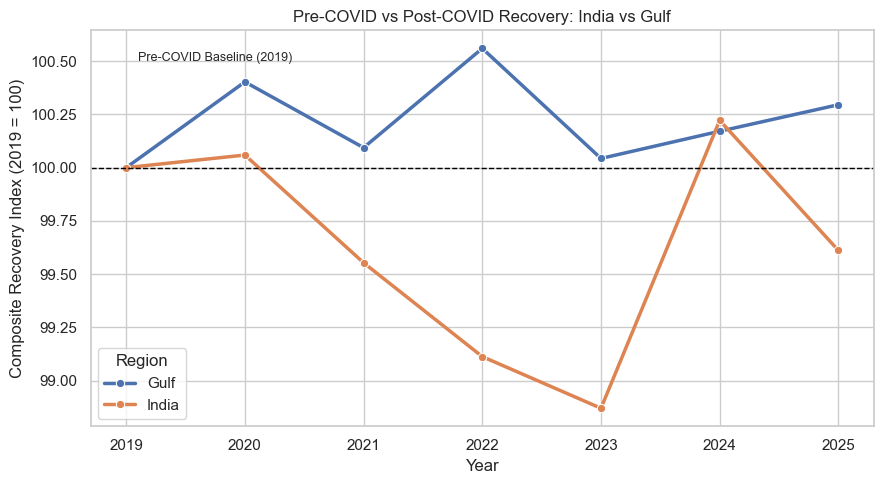

In [66]:
plt.figure(figsize=(9,5))

sns.lineplot(
    data=region_summary,
    x='Year',
    y='Composite_Recovery_Index',
    hue='Region',
    marker='o',
    linewidth=2.5
)

plt.axhline(100, linestyle='--', color='black', linewidth=1)
plt.text(2019.1, 100.5, 'Pre-COVID Baseline (2019)', fontsize=9)

plt.title('Pre-COVID vs Post-COVID Recovery: India vs Gulf')
plt.ylabel('Composite Recovery Index (2019 = 100)')
plt.xlabel('Year')
plt.tight_layout()
plt.show()
# Both Indian and Gulf airlines have largely returned to their pre-COVID levels when looking at overall recovery. 
# Gulf airlines show a more stable recovery, staying close to the 2019 level throughout the period.
# Indian airlines experienced a slightly slower and more uneven recovery, dipping below pre-COVID levels for a few years before improving again. 
# Overall, the Gulf region appears more consistent, while India shows higher ups and downs
# Gulf airlines recovered more steadily, while Indian airlines showed more fluctuation before returning close to pre-COVID levels.
# Using 2019 as the pre-COVID baseline makes it clear that while most airlines have recovered operationally, full financial recovery remains uneven.